### This is a separate for-loop code for indentifying split/displaced events based on thresholds across all data and plotting them. 

In [1]:
#relevant import statements
import numpy as np
import math
import xarray as xr 
import pickle 
import matplotlib.pyplot as plt
import pandas as pd
import matplotlib.ticker as mticker

In [2]:
infile = open("./diagnostics/wind_1959.p", 'rb') 
wind = pickle.load(infile)
infile.close()

infile = open("./diagnostics/size_1959.p", 'rb') 
size = pickle.load(infile)
infile.close()

infile = open("./diagnostics/ratio_1959.p", 'rb') 
rat = pickle.load(infile)
infile.close()

infile = open("./diagnostics/ephi_1959.p", 'rb') 
ephi = pickle.load(infile)
infile.close()

infile = open("./diagnostics/cenlat_1959.p", 'rb')
cenlat = pickle.load(infile)
infile.close()

infile = open("./diagnostics/cenlon_1959.p", 'rb') 
cenlon = pickle.load(infile)
infile.close()

infile = open("./diagnostics/number_1959.p", 'rb') 
number = pickle.load(infile)
infile.close()

infile = open("./diagnostics/ANOM_weighted_capgph_1959.p", 'rb') 
gph1000 = pickle.load(infile)
infile.close()

In [3]:
#remove repeat year
wind = np.delete(wind,[20],0)
rat = np.delete(rat,[20],0)
cenlat = np.delete(cenlat,[20],0)
cenlon = np.delete(cenlon,[20],0)
size = np.delete(size,[20],0)
ephi = np.delete(ephi,[20],0)
number = np.delete(number,[20],0)

In [4]:
#remove leap day
gph1000 = np.delete(gph1000,[120],1)

In [5]:
print(wind.shape)
print(number.shape)
print(gph1000.shape)

(63, 2, 151)
(63, 151)
(63, 151)


In [6]:
rat[2,0,85:]

array([2.24718257, 2.29931693, 2.21680948, 2.16661314, 2.09574094,
       2.22665866, 2.32384373, 2.32904901, 2.35166567, 2.44293375,
       2.65477348, 2.64568436, 2.43461632, 2.07948967, 2.11500761,
       1.86060543, 1.55312169, 1.39022685, 1.14069268, 1.14381805,
       1.09543456, 1.11650925, 1.19248885, 1.12661656, 1.14560202,
       1.25581313, 1.3140522 , 1.4370469 , 1.38781398, 1.58145061,
       1.73194767, 2.23439152, 2.61240769, 2.62528081, 2.4395784 ,
       1.79971607, 1.55028031, 1.94287184, 1.99984938, 2.18590495,
       2.24481742, 2.37254502, 2.62519712, 2.7191323 , 2.95808994,
       3.10102659, 2.89995785, 1.51700767, 1.36049295, 2.4451651 ,
       2.23895556, 1.81983362, 1.7607892 , 1.48110659, 1.39554871,
       1.29144474, 1.14163543, 1.17811945, 1.16551747, 1.04598513,
       1.15347582, 1.27623736, 1.24140992, 1.30979696, 1.37164999,
       1.27639143])

In [7]:
number[2,85:]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2., 2., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [8]:
##saving split event indices
split_i = []
split_onset = []

##saving displaced event indices
disp_i = []
disp_onset = []

In [9]:
##identifying *all* displaced events
for i in range(0,63):
    for j in range(0,141):
        ##was originally 69 before messing around with conditions
        if cenlat[i,0,j] >= 67:
            continue
        if cenlat[i,0,j] < 67:
            if number[i,j] == 2:
                continue
            if number[i,j] == 1:
                if np.all(cenlat[i,0,j:j+6] < 67) and cenlat[i,0,j-1] >= 67:
                    if np.any(number[i,j-9:j] == 2):
                        continue
                    if np.any(number[i,j:j+9] == 2):
                        continue
                    else:
                        #print(j)
                        disp_i.append(i)
                        disp_onset.append(j)      
                if np.all(cenlat[i,0,j:j+6] < 67) and cenlat[i,0,j-1] < 67:
                    continue  

In [10]:
##identifying *all* split events
for i in range(0,63):
    for j in range(1,141):
        if rat[i,0,j]/rat[i,0,j-1] <= 0.65: ##50% change
            if number[i,j] == 2:
                if np.any(number[i,j:j+6] == 2) and number[i,j-1] == 1:
                    if np.any(number[i,j-9:j] == 2):
                        continue
                    else:
                        split_i.append(i)
                        split_onset.append(j)
                if np.all(number[i,j:j+6] == 2) and number[i,j-1] == 2:
                    continue  
        if rat[i,0,j]/rat[i,0,j-1] > 0.65 and np.all(cenlat[i,0,j:j+6] < 67): 
            if number[i,j] == 2:
                if np.any(number[i,j:j+6] == 2) and number[i,j-1] == 1:
                    if np.any(number[i,j-9:j] == 2):
                        continue
                    else:
                        split_i.append(i)
                        split_onset.append(j)
                if np.all(number[i,j:j+6] == 2) and number[i,j-1] == 2:
                    continue  
        else:
            continue

In [11]:
print(len(disp_i))
print(disp_i)
print(len(disp_onset))
print(disp_onset)

32
[1, 3, 4, 6, 9, 10, 12, 14, 15, 18, 20, 20, 21, 24, 25, 26, 27, 30, 32, 35, 41, 42, 42, 44, 45, 46, 48, 48, 50, 52, 57, 58]
32
[128, 102, 134, 44, 26, 81, 113, 131, 135, 131, 117, 136, 120, 115, 75, 133, 79, 99, 74, 87, 98, 54, 116, 61, 131, 76, 109, 130, 86, 73, 90, 135]


In [12]:
print(len(split_i))
print(split_i)
print(len(split_onset))
print(split_onset)

30
[2, 3, 5, 6, 8, 11, 13, 15, 17, 19, 22, 25, 27, 28, 28, 29, 31, 39, 41, 43, 43, 44, 49, 53, 53, 54, 58, 59, 62, 62]
30
[132, 121, 139, 117, 63, 74, 92, 97, 75, 112, 84, 58, 103, 41, 132, 110, 93, 117, 45, 86, 108, 83, 83, 68, 92, 106, 102, 63, 124, 137]


In [13]:
##delete overlapping events in individual event types
for i in range(len(disp_i)-1,-1,-1):
    print(disp_i[i])
    if disp_i[i] == disp_i[i-1]:
        if disp_onset[i] < disp_onset[i-1]+30:
            print("too close")
            print(disp_onset[i-1])
            print(disp_onset[i])
            del disp_i[i]
            del disp_onset[i]
            print('#####')
    else:
        continue

58
57
52
50
48
too close
109
130
#####
48
46
45
44
42
42
41
35
32
30
27
26
25
24
21
20
too close
117
136
#####
20
18
15
14
12
10
9
6
4
3
1


In [14]:
for i in range(len(split_i) - 1, -1, -1):
    print(split_i[i])
    if split_i[i] == split_i[i-1]:
        if split_onset[i] < split_onset[i-1]+30:
            print("too close")
            print(split_onset[i-1])
            print(split_onset[i])
            del split_i[i]
            del split_onset[i]
            print('#####')

62
too close
124
137
#####
62
59
58
54
53
too close
68
92
#####
53
49
44
43
too close
86
108
#####
43
41
39
31
29
28
28
27
25
22
19
17
15
13
11
8
6
5
3
2


In [15]:
print(len(disp_i))
print(disp_i)
print(len(disp_onset))
print(disp_onset)

30
[1, 3, 4, 6, 9, 10, 12, 14, 15, 18, 20, 21, 24, 25, 26, 27, 30, 32, 35, 41, 42, 42, 44, 45, 46, 48, 50, 52, 57, 58]
30
[128, 102, 134, 44, 26, 81, 113, 131, 135, 131, 117, 120, 115, 75, 133, 79, 99, 74, 87, 98, 54, 116, 61, 131, 76, 109, 86, 73, 90, 135]


In [16]:
print(len(split_i))
print(split_i)
print(len(split_onset))
print(split_onset)

27
[2, 3, 5, 6, 8, 11, 13, 15, 17, 19, 22, 25, 27, 28, 28, 29, 31, 39, 41, 43, 44, 49, 53, 54, 58, 59, 62]
27
[132, 121, 139, 117, 63, 74, 92, 97, 75, 112, 84, 58, 103, 41, 132, 110, 93, 117, 45, 86, 83, 83, 68, 106, 102, 63, 124]


In [17]:
##delete overlapping events across event type
for j in range(len(split_i) - 1, -1, -1):
    for i in range(len(disp_i) - 1, -1, -1):
        #print(disp_i[i])
        #print(split_i[j])
        if disp_i[i] == split_i[j]:
            print("Displaced: ",disp_i[i]," ",disp_onset[i] )
            print("Split: ",split_i[j]," ",split_onset[j])
            if disp_onset[i] > split_onset[j] and disp_onset[i] <= split_onset[j]+30:
                print("Disp too close")
                del disp_i[i]
                del disp_onset[i]
                print("########")
                continue
            if split_onset[j] > disp_onset[i] and split_onset[j] <= disp_onset[i]+30:
                print("Split too close")
                del split_i[j]
                del split_onset[j]
                print("########")
            else:
                continue


Displaced:  58   135
Split:  58   102
Displaced:  44   61
Split:  44   83
Split too close
########
Displaced:  41   98
Split:  41   45
Displaced:  27   79
Split:  27   103
Split too close
########
Displaced:  25   75
Split:  25   58
Disp too close
########
Displaced:  15   135
Split:  15   97
Displaced:  6   44
Split:  6   117
Displaced:  3   102
Split:  3   121
Split too close
########


In [18]:
print(len(disp_i))
print(disp_i)
print(len(disp_onset))
print(disp_onset)

29
[1, 3, 4, 6, 9, 10, 12, 14, 15, 18, 20, 21, 24, 26, 27, 30, 32, 35, 41, 42, 42, 44, 45, 46, 48, 50, 52, 57, 58]
29
[128, 102, 134, 44, 26, 81, 113, 131, 135, 131, 117, 120, 115, 133, 79, 99, 74, 87, 98, 54, 116, 61, 131, 76, 109, 86, 73, 90, 135]


In [19]:
print(len(split_i))
print(split_i)
print(len(split_onset))
print(split_onset)

24
[2, 5, 6, 8, 11, 13, 15, 17, 19, 22, 25, 28, 28, 29, 31, 39, 41, 43, 49, 53, 54, 58, 59, 62]
24
[132, 139, 117, 63, 74, 92, 97, 75, 112, 84, 58, 41, 132, 110, 93, 117, 45, 86, 83, 68, 106, 102, 63, 124]


In [20]:
##plot all ?

In [21]:
full = split_i+disp_i
len(full)

53

In [22]:
onset = split_onset+disp_onset
len(onset)

53

In [23]:
##SSW Averaging Timelines
ssw_wind = np.empty((len(full),2,20))
ssw_wind[:] = np.nan

ssw_rat = np.empty((len(full),2,20))
ssw_rat[:] = np.nan

ssw_size = np.empty((len(full),2,20))
ssw_size[:] = np.nan

ssw_cenlt = np.empty((len(full),2,20))
ssw_cenlt[:] = np.nan

ssw_cenln = np.empty((len(full),2,20))
ssw_cenln[:] = np.nan

ssw_ep= np.empty((len(full),2,20))
ssw_ep[:] = np.nan

ssw_num= np.empty((len(full),20))
ssw_num[:] = np.nan

ssw_g= np.empty((len(full),20))
ssw_g[:] = np.nan

for i in range(len(onset)):
    #print(i)
    d1 = int(onset[i]-10)
    #print(d1)
    d2 = int(onset[i]+10)
    #print(d2)
    
    ##diagnostics
    
    w = wind[full[i],:,d1:d2] #wind
    ssw_wind[i] = w[:]
    
    r = rat[full[i],:,d1:d2]
    ssw_rat[i] = r[:]
    
    clt = cenlat[full[i],:,d1:d2]
    ssw_cenlt[i] = clt[:]

    cln = cenlon[full[i],:,d1:d2]
    ssw_cenln[i] = cln[:]
    
    sz = size[full[i],:,d1:d2]
    ssw_size[i] = sz[:]
    
    ep = ephi[full[i],:,d1:d2]
    ssw_ep[i] = ep[:]

    num = number[full[i],d1:d2]
    ssw_num[i] = num[:]
    
    g = gph1000[full[i],d1:d2]
    ssw_g[i] = g[:]

In [24]:
sswrat1 = np.nanmean(ssw_rat[:,0,:],axis=0)
sswwind1 =  np.nanmean(ssw_wind[:,0,:],axis=0)
sswcenlt1 =  np.nanmean(ssw_cenlt[:,0,:],axis=0)
sswcenln1 =  np.nanmean(ssw_cenln[:,0,:],axis=0)
sswsize1 =  np.nanmean(ssw_size[:,0,:],axis=0)
sswep1 =  np.nanmean(ssw_ep[:,0,:],axis=0)
sswnum1 =  np.nanmean(ssw_num[:,:],axis=0)
sswg1 =  np.nanmean(ssw_g[:,:],axis=0)

sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)

<ipython-input-24-edd7b39428fa>:10: RuntimeWarning: Mean of empty slice
  sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
<ipython-input-24-edd7b39428fa>:11: RuntimeWarning: Mean of empty slice
  sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
<ipython-input-24-edd7b39428fa>:12: RuntimeWarning: Mean of empty slice
  sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
<ipython-input-24-edd7b39428fa>:13: RuntimeWarning: Mean of empty slice
  sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
<ipython-input-24-edd7b39428fa>:14: RuntimeWarning: Mean of empty slice
  sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
<ipython-input-24-edd7b39428fa>:15: RuntimeWarning: Mean of empty slice
  sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)


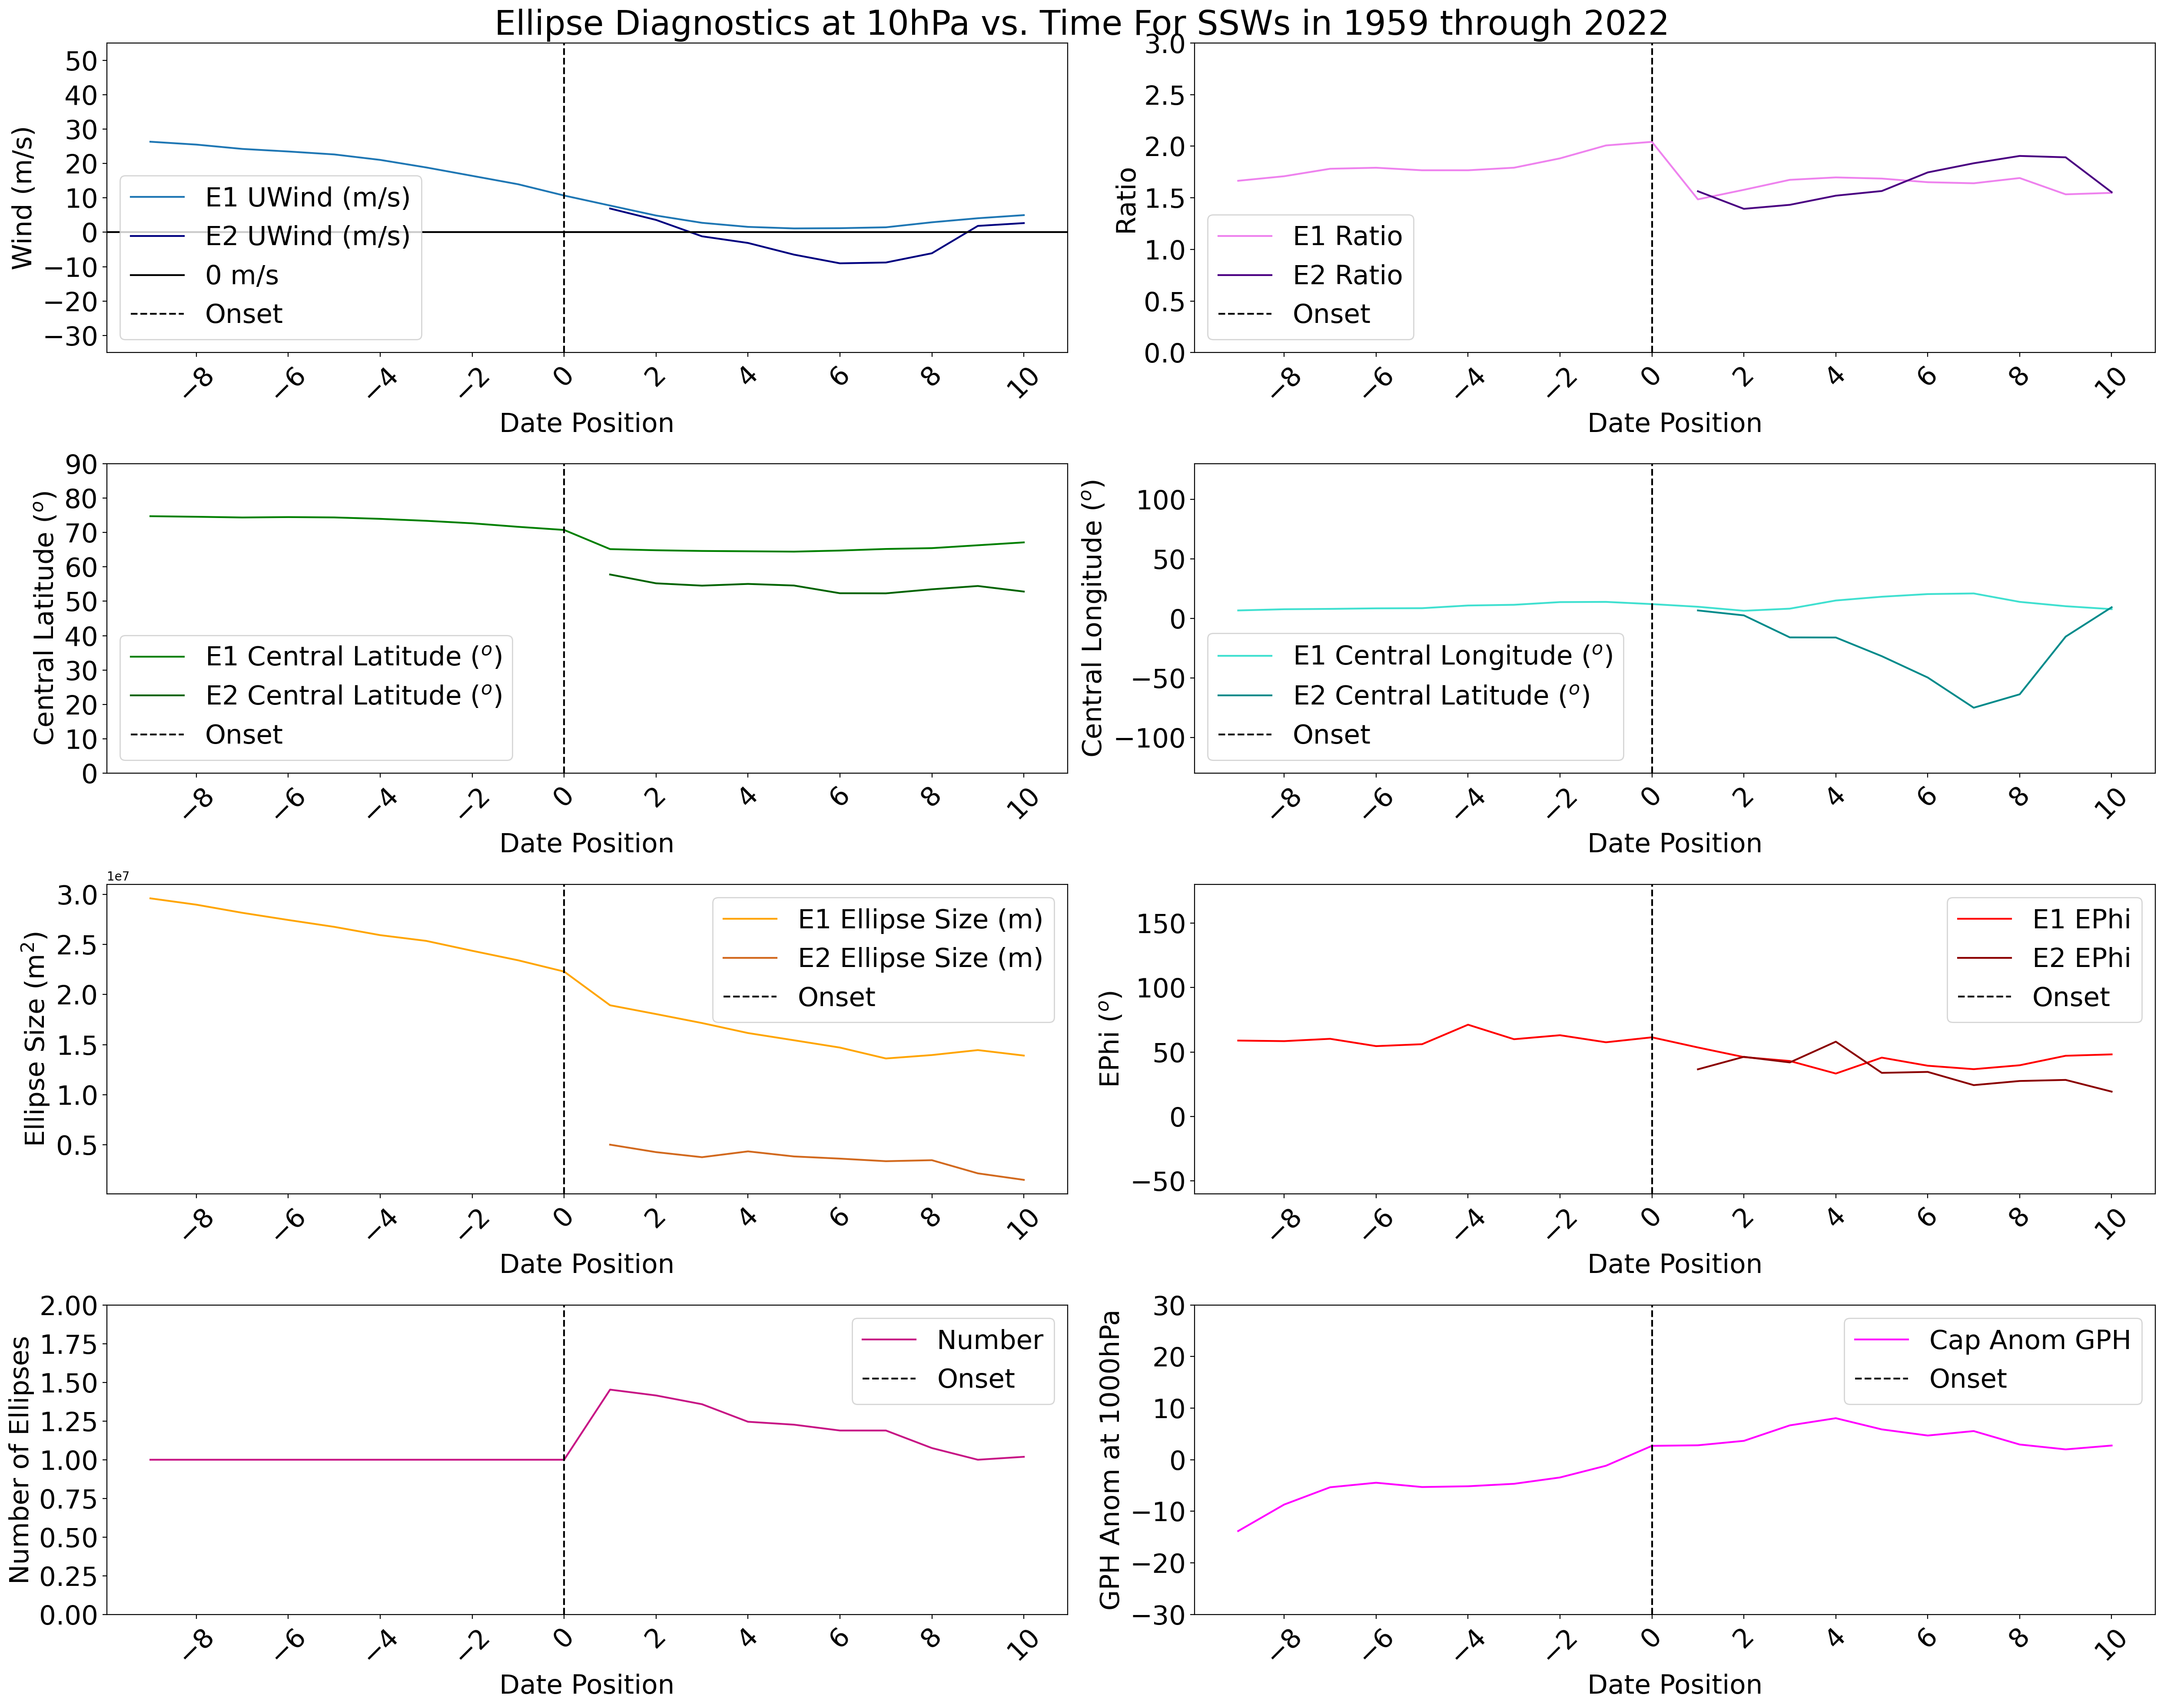

In [25]:
myLocator = mticker.MultipleLocator(2)
l2 = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

fs = 22

fig = plt.figure(figsize=(25,20),dpi=200)

plt.suptitle("Ellipse Diagnostics at 10hPa vs. Time For SSWs in 1959 through 2022", fontsize = 28)
ax1 = plt.subplot(4,2,1)
ax1.plot(l2, sswwind1, label = "E1 UWind (m/s)")
ax1.plot(l2, sswwind2, label = "E2 UWind (m/s)", color='navy')
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = fs)
ax1.set_ylim(-35,55)
ax1.set_xlabel("Date Position", fontsize = fs)
ax1.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax2 = plt.subplot(4,2,2)
ax2.plot(l2, sswrat1, label = "E1 Ratio", color = "violet")
ax2.plot(l2, sswrat2, label = "E2 Ratio", color = "indigo")
ax2.set_ylabel("Ratio", fontsize = fs)
ax2.set_ylim(0,3)
ax2.set_xlabel("Date Position", fontsize = fs)
ax2.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)
    
ax3 = plt.subplot(4,2,3)
ax3.plot(l2, sswcenlt1, label = "E1 Central Latitude ($^o$)", color = "green")
ax3.plot(l2, sswcenlt2, label = "E2 Central Latitude ($^o$)",color = "darkgreen")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = fs)
ax3.set_xlabel("Date Position", fontsize = fs)
ax3.set_ylim(0,90)
ax3.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax4 = plt.subplot(4,2,4)
ax4.plot(l2, sswcenln1, label = "E1 Central Longitude ($^o$)", color = "turquoise")
ax4.plot(l2, sswcenln2, label = "E2 Central Latitude ($^o$)", color = "darkcyan")
ax4.set_ylabel("Central Longitude ($^o$)", fontsize = fs)
ax4.set_xlabel("Date Position", fontsize = fs)
ax4.set_ylim(-130,130)
ax4.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax5 = plt.subplot(4,2,5)
ax5.plot(l2, sswsize1, label = "E1 Ellipse Size (m)", color = "orange")
ax5.plot(l2, sswsize2, label = "E2 Ellipse Size (m)",color = "chocolate")
ax5.set_ylabel("Ellipse Size (m$^2$)", fontsize = fs)
ax5.set_xlabel("Date Position", fontsize = fs)
ax5.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

ax6 = plt.subplot(4,2,6)
ax6.plot(l2, sswep1, label = "E1 EPhi", color = "red")
ax6.plot(l2, sswep2, label = "E2 EPhi", color = "darkred")
ax6.set_ylabel("EPhi ($^o$)", fontsize = fs)
ax6.set_ylim(-60,180)
ax6.set_xlabel("Date Position", fontsize = fs)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

ax7 = plt.subplot(4,2,7)
ax7.plot(l2, sswnum1, label = "Number", color = "mediumvioletred")
ax7.set_ylabel("Number of Ellipses", fontsize = fs)
ax7.set_xlabel("Date Position", fontsize = fs)
ax7.set_ylim(0,2)
ax7.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

ax8 = plt.subplot(4,2,8)
ax8.plot(l2, sswg1, label = "Cap Anom GPH", color = "magenta")
ax8.set_ylabel("GPH Anom at 1000hPa", fontsize = fs)
ax8.set_xlabel("Date Position", fontsize = fs)
ax8.set_ylim(-30,30)
ax8.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)
    
plt.xticks(rotation=45,fontsize = fs)
plt.tight_layout()    
plt.savefig("OUR_SSWClimo.png")


In [26]:
##Displaced Events

In [27]:
ssw_wind = np.empty((len(disp_i),2,20))
ssw_wind[:] = np.nan

ssw_rat = np.empty((len(disp_i),2,20))
ssw_rat[:] = np.nan

ssw_size = np.empty((len(disp_i),2,20))
ssw_size[:] = np.nan

ssw_cenlt = np.empty((len(disp_i),2,20))
ssw_cenlt[:] = np.nan

ssw_cenln = np.empty((len(disp_i),2,20))
ssw_cenln[:] = np.nan

ssw_ep= np.empty((len(disp_i),2,20))
ssw_ep[:] = np.nan

ssw_num= np.empty((len(disp_i),20))
ssw_num[:] = np.nan

ssw_g= np.empty((len(disp_i),20))
ssw_g[:] = np.nan

for i in range(len(disp_i)):
    #print(i)
    d1 = int(disp_onset[i]-10)
    #print(d1)
    d2 = int(disp_onset[i]+10)
    #print(d2)
    
    ##diagnostics
    
    w = wind[disp_i[i],:,d1:d2] #wind
    ssw_wind[i] = w[:]
    
    r = rat[disp_i[i],:,d1:d2]
    ssw_rat[i] = r[:]
    
    clt = cenlat[disp_i[i],:,d1:d2]
    ssw_cenlt[i] = clt[:]

    cln = cenlon[disp_i[i],:,d1:d2]
    ssw_cenln[i] = cln[:]
    
    sz = size[disp_i[i],:,d1:d2]
    ssw_size[i] = sz[:]
    
    ep = ephi[disp_i[i],:,d1:d2]
    ssw_ep[i] = ep[:]

    num = number[disp_i[i],d1:d2]
    ssw_num[i] = num[:]
    
    g = gph1000[disp_i[i],d1:d2]
    ssw_g[i] = g[:]

In [28]:
sswrat1 = np.nanmean(ssw_rat[:,0,:],axis=0)
sswwind1 =  np.nanmean(ssw_wind[:,0,:],axis=0)
sswcenlt1 =  np.nanmean(ssw_cenlt[:,0,:],axis=0)
sswcenln1 =  np.nanmean(ssw_cenln[:,0,:],axis=0)
sswsize1 =  np.nanmean(ssw_size[:,0,:],axis=0)
sswep1 =  np.nanmean(ssw_ep[:,0,:],axis=0)
sswnum1 =  np.nanmean(ssw_num[:,:],axis=0)
sswg1 =  np.nanmean(ssw_g[:,:],axis=0)

sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)

<ipython-input-28-edd7b39428fa>:10: RuntimeWarning: Mean of empty slice
  sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
<ipython-input-28-edd7b39428fa>:11: RuntimeWarning: Mean of empty slice
  sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
<ipython-input-28-edd7b39428fa>:12: RuntimeWarning: Mean of empty slice
  sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
<ipython-input-28-edd7b39428fa>:13: RuntimeWarning: Mean of empty slice
  sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
<ipython-input-28-edd7b39428fa>:14: RuntimeWarning: Mean of empty slice
  sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
<ipython-input-28-edd7b39428fa>:15: RuntimeWarning: Mean of empty slice
  sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)


<ipython-input-29-7cec93205a1d>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(4,2,1)


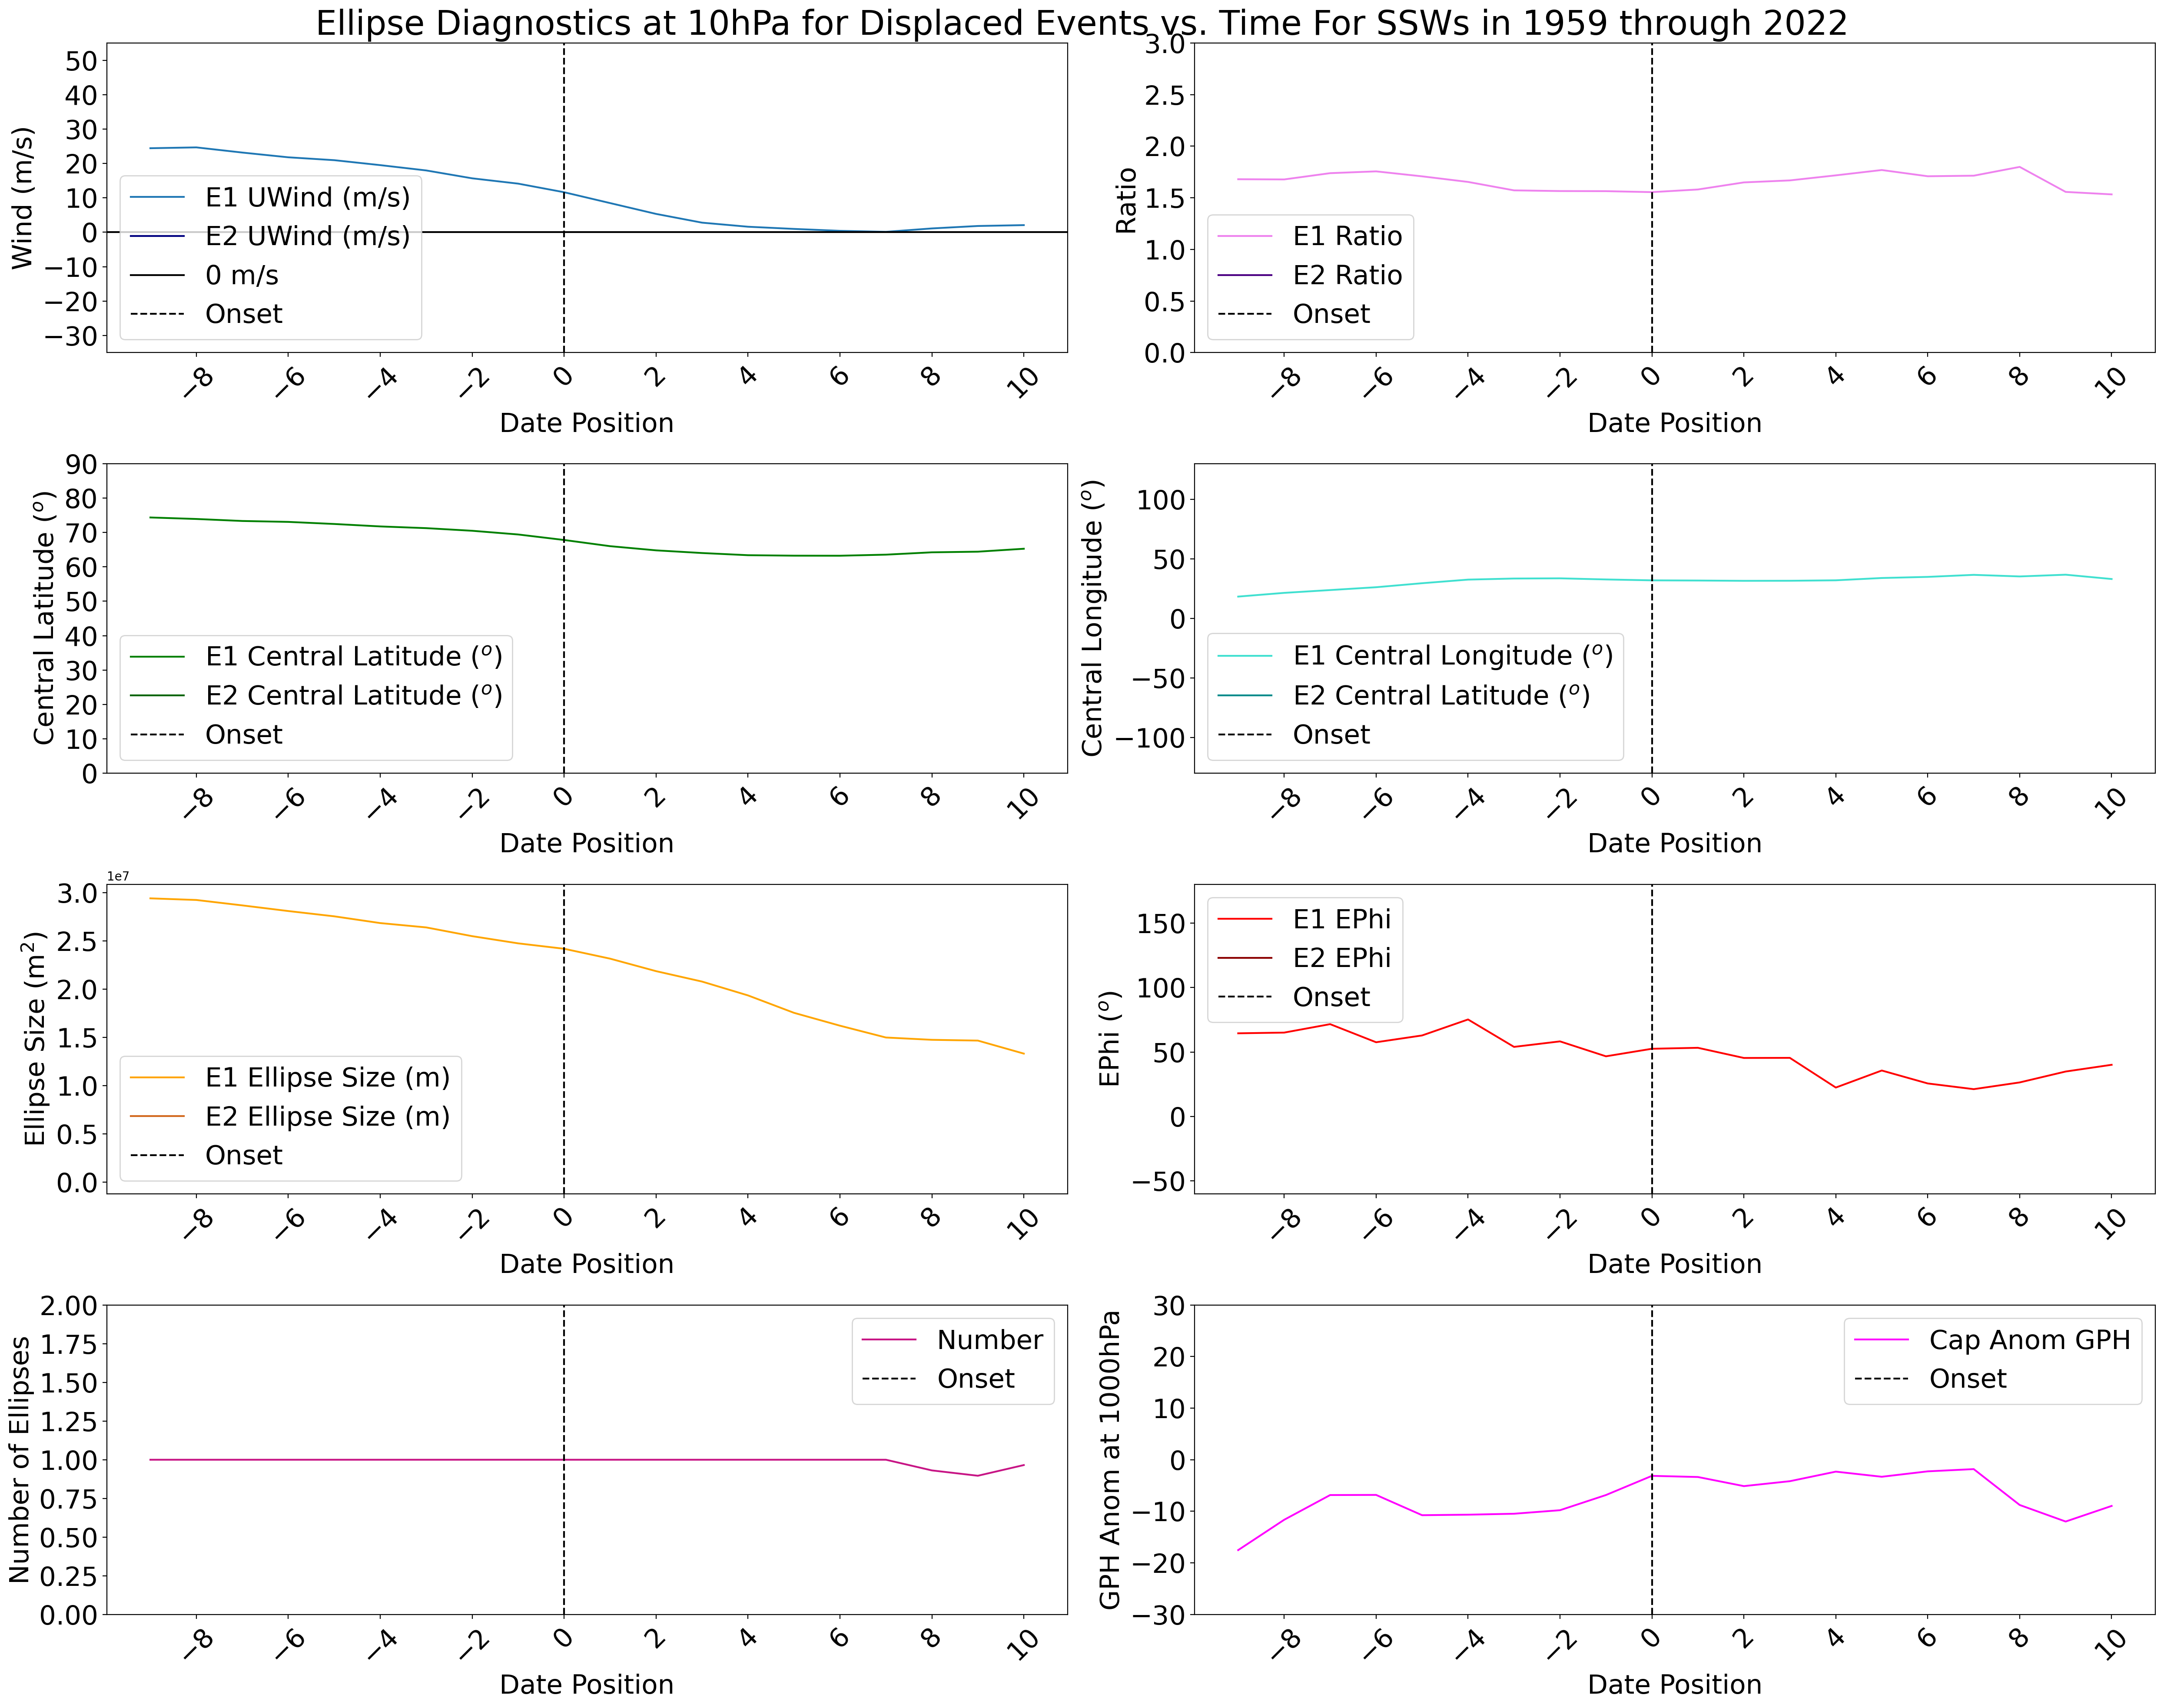

In [29]:
myLocator = mticker.MultipleLocator(2)
l2 = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

fs = 22

fig = plt.figure(figsize=(25,20),dpi=200)
ax1 = plt.subplot(4,2,1)

plt.suptitle("Ellipse Diagnostics at 10hPa for Displaced Events vs. Time For SSWs in 1959 through 2022", fontsize = 28)
plt.xticks(rotation=45,fontsize = fs)

ax1 = plt.subplot(4,2,1)
ax1.plot(l2, sswwind1, label = "E1 UWind (m/s)")
ax1.plot(l2, sswwind2, label = "E2 UWind (m/s)", color='navy')
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = fs)
ax1.set_ylim(-35,55)
ax1.set_xlabel("Date Position", fontsize = fs)
ax1.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax2 = plt.subplot(4,2,2)
ax2.plot(l2, sswrat1, label = "E1 Ratio", color = "violet")
ax2.plot(l2, sswrat2, label = "E2 Ratio", color = "indigo")
ax2.set_ylabel("Ratio", fontsize = fs)
ax2.set_ylim(0,3)
ax2.set_xlabel("Date Position", fontsize = fs)
ax2.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)
    
ax3 = plt.subplot(4,2,3)
ax3.plot(l2, sswcenlt1, label = "E1 Central Latitude ($^o$)", color = "green")
ax3.plot(l2, sswcenlt2, label = "E2 Central Latitude ($^o$)",color = "darkgreen")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = fs)
ax3.set_xlabel("Date Position", fontsize = fs)
ax3.set_ylim(0,90)
ax3.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax4 = plt.subplot(4,2,4)
ax4.plot(l2, sswcenln1, label = "E1 Central Longitude ($^o$)", color = "turquoise")
ax4.plot(l2, sswcenln2, label = "E2 Central Latitude ($^o$)", color = "darkcyan")
ax4.set_ylabel("Central Longitude ($^o$)", fontsize = fs)
ax4.set_xlabel("Date Position", fontsize = fs)
ax4.set_ylim(-130,130)
ax4.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax5 = plt.subplot(4,2,5)
ax5.plot(l2, sswsize1, label = "E1 Ellipse Size (m)", color = "orange")
ax5.plot(l2, sswsize2, label = "E2 Ellipse Size (m)",color = "chocolate")
ax5.set_ylabel("Ellipse Size (m$^2$)", fontsize = fs)
ax5.set_xlabel("Date Position", fontsize = fs)
ax5.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

ax6 = plt.subplot(4,2,6)
ax6.plot(l2, sswep1, label = "E1 EPhi", color = "red")
ax6.plot(l2, sswep2, label = "E2 EPhi", color = "darkred")
ax6.set_ylabel("EPhi ($^o$)", fontsize = fs)
ax6.set_ylim(-60,180)
ax6.set_xlabel("Date Position", fontsize = fs)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

ax7 = plt.subplot(4,2,7)
ax7.plot(l2, sswnum1, label = "Number", color = "mediumvioletred")
ax7.set_ylabel("Number of Ellipses", fontsize = fs)
ax7.set_xlabel("Date Position", fontsize = fs)
ax7.set_ylim(0,2)
ax7.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

 
ax8 = plt.subplot(4,2,8)
ax8.plot(l2, sswg1, label = "Cap Anom GPH", color = "magenta")
ax8.set_ylabel("GPH Anom at 1000hPa", fontsize = fs)
ax8.set_xlabel("Date Position", fontsize = fs)
ax8.set_ylim(-30,30)
ax8.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

plt.tight_layout() 
plt.savefig("OURDisplaced_SSWClimoTimeline.png")


In [30]:
##Split Events

In [31]:
ssw_wind = np.empty((len(split_i),2,20))
ssw_wind[:] = np.nan

ssw_rat = np.empty((len(split_i),2,20))
ssw_rat[:] = np.nan

ssw_size = np.empty((len(split_i),2,20))
ssw_size[:] = np.nan

ssw_cenlt = np.empty((len(split_i),2,20))
ssw_cenlt[:] = np.nan

ssw_cenln = np.empty((len(split_i),2,20))
ssw_cenln[:] = np.nan

ssw_ep= np.empty((len(split_i),2,20))
ssw_ep[:] = np.nan

ssw_num= np.empty((len(split_i),20))
ssw_num[:] = np.nan

ssw_g= np.empty((len(split_i),20))
ssw_g[:] = np.nan

for i in range(len(split_i)):
    #print(i)
    d1 = int(split_onset[i]-10)
    #print(d1)
    d2 = int(split_onset[i]+10)
    #print(d2)
    
    ##diagnostics
    
    w = wind[split_i[i],:,d1:d2] #wind
    ssw_wind[i] = w[:]
    
    r = rat[split_i[i],:,d1:d2]
    ssw_rat[i] = r[:]
    
    clt = cenlat[split_i[i],:,d1:d2]
    ssw_cenlt[i] = clt[:]

    cln = cenlon[split_i[i],:,d1:d2]
    ssw_cenln[i] = cln[:]
    
    sz = size[split_i[i],:,d1:d2]
    ssw_size[i] = sz[:]
    
    ep = ephi[split_i[i],:,d1:d2]
    ssw_ep[i] = ep[:]

    num = number[split_i[i],d1:d2]
    ssw_num[i] = num[:]
    
    g = gph1000[split_i[i],d1:d2]
    ssw_g[i] = g[:]

In [32]:
sswrat1 = np.nanmean(ssw_rat[:,0,:],axis=0)
sswwind1 =  np.nanmean(ssw_wind[:,0,:],axis=0)
sswcenlt1 =  np.nanmean(ssw_cenlt[:,0,:],axis=0)
sswcenln1 =  np.nanmean(ssw_cenln[:,0,:],axis=0)
sswsize1 =  np.nanmean(ssw_size[:,0,:],axis=0)
sswep1 =  np.nanmean(ssw_ep[:,0,:],axis=0)
sswnum1 =  np.nanmean(ssw_num[:,:],axis=0)
sswg1 =  np.nanmean(ssw_g[:,:],axis=0)

sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)

<ipython-input-32-edd7b39428fa>:10: RuntimeWarning: Mean of empty slice
  sswrat2 =  np.nanmean(ssw_rat[:,1,:],axis=0)
<ipython-input-32-edd7b39428fa>:11: RuntimeWarning: Mean of empty slice
  sswwind2 =  np.nanmean(ssw_wind[:,1,:],axis=0)
<ipython-input-32-edd7b39428fa>:12: RuntimeWarning: Mean of empty slice
  sswcenlt2 =  np.nanmean(ssw_cenlt[:,1,:],axis=0)
<ipython-input-32-edd7b39428fa>:13: RuntimeWarning: Mean of empty slice
  sswcenln2 =  np.nanmean(ssw_cenln[:,1,:],axis=0)
<ipython-input-32-edd7b39428fa>:14: RuntimeWarning: Mean of empty slice
  sswsize2 =  np.nanmean(ssw_size[:,1,:],axis=0)
<ipython-input-32-edd7b39428fa>:15: RuntimeWarning: Mean of empty slice
  sswep2 =  np.nanmean(ssw_ep[:,1,:],axis=0)


<ipython-input-34-2ff822740cc1>:12: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  ax1 = plt.subplot(4,2,1)


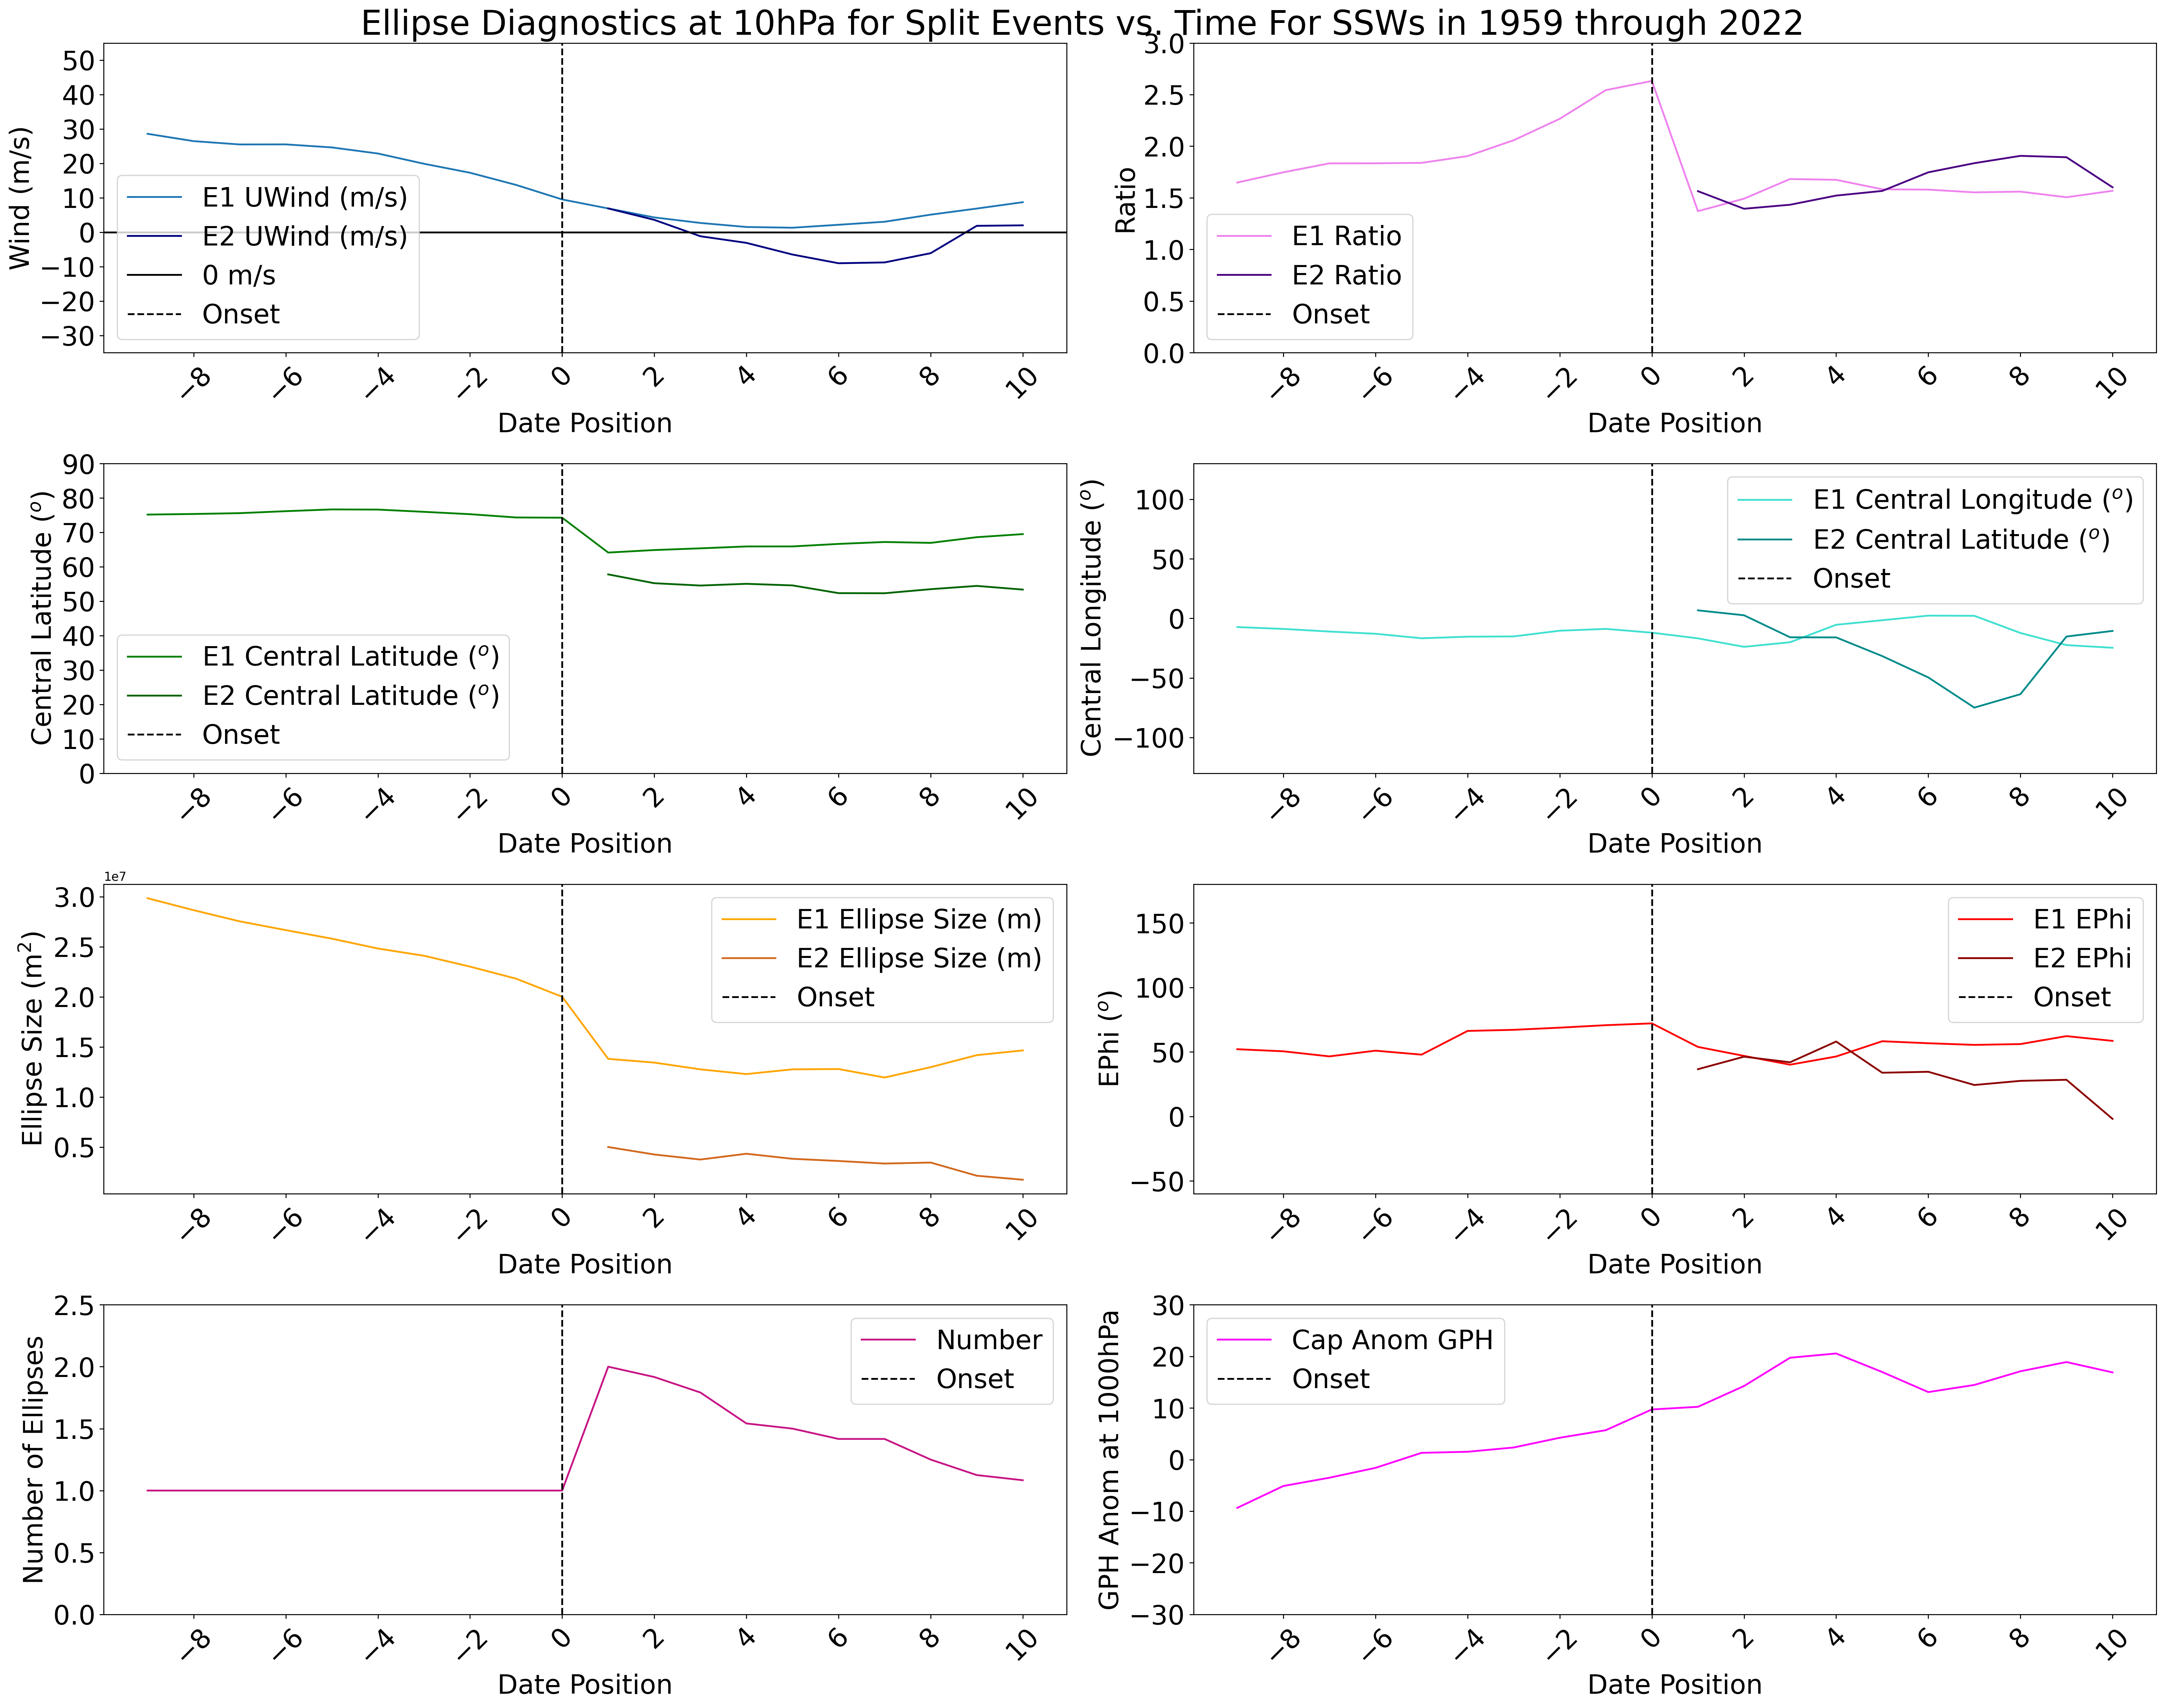

In [34]:
myLocator = mticker.MultipleLocator(2)
l2 = [-9,-8,-7,-6,-5,-4,-3,-2,-1,0,1,2,3,4,5,6,7,8,9,10]

fs = 22

fig = plt.figure(figsize=(25,20),dpi=250)
ax1 = plt.subplot(4,2,1)

plt.suptitle("Ellipse Diagnostics at 10hPa for Split Events vs. Time For SSWs in 1959 through 2022", fontsize = 28)
plt.xticks(rotation=45,fontsize = fs)

ax1 = plt.subplot(4,2,1)
ax1.plot(l2, sswwind1, label = "E1 UWind (m/s)")
ax1.plot(l2, sswwind2, label = "E2 UWind (m/s)", color='navy')
ax1.axhline(y=0, color='k', linestyle='-', label = "0 m/s")
ax1.set_ylabel("Wind (m/s)", fontsize = fs)
ax1.set_ylim(-35,55)
ax1.set_xlabel("Date Position", fontsize = fs)
ax1.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax2 = plt.subplot(4,2,2)
ax2.plot(l2, sswrat1, label = "E1 Ratio", color = "violet")
ax2.plot(l2, sswrat2, label = "E2 Ratio", color = "indigo")
ax2.set_ylabel("Ratio", fontsize = fs)
ax2.set_ylim(0,3)
ax2.set_xlabel("Date Position", fontsize = fs)
ax2.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)
    
ax3 = plt.subplot(4,2,3)
ax3.plot(l2, sswcenlt1, label = "E1 Central Latitude ($^o$)", color = "green")
ax3.plot(l2, sswcenlt2, label = "E2 Central Latitude ($^o$)",color = "darkgreen")
ax3.set_ylabel("Central Latitude ($^o$)", fontsize = fs)
ax3.set_xlabel("Date Position", fontsize = fs)
ax3.set_ylim(0,90)
ax3.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax4 = plt.subplot(4,2,4)
ax4.plot(l2, sswcenln1, label = "E1 Central Longitude ($^o$)", color = "turquoise")
ax4.plot(l2, sswcenln2, label = "E2 Central Latitude ($^o$)", color = "darkcyan")
ax4.set_ylabel("Central Longitude ($^o$)", fontsize = fs)
ax4.set_xlabel("Date Position", fontsize = fs)
ax4.set_ylim(-130,130)
ax4.xaxis.set_major_locator(myLocator)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.legend(fontsize = fs)

ax5 = plt.subplot(4,2,5)
ax5.plot(l2, sswsize1, label = "E1 Ellipse Size (m)", color = "orange")
ax5.plot(l2, sswsize2, label = "E2 Ellipse Size (m)",color = "chocolate")
ax5.set_ylabel("Ellipse Size (m$^2$)", fontsize = fs)
ax5.set_xlabel("Date Position", fontsize = fs)
ax5.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

ax6 = plt.subplot(4,2,6)
ax6.plot(l2, sswep1, label = "E1 EPhi", color = "red")
ax6.plot(l2, sswep2, label = "E2 EPhi", color = "darkred")
ax6.set_ylabel("EPhi ($^o$)", fontsize = fs)
ax6.set_ylim(-60,180)
ax6.set_xlabel("Date Position", fontsize = fs)
ax6.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

ax7 = plt.subplot(4,2,7)
ax7.plot(l2, sswnum1, label = "Number", color = "mediumvioletred")
ax7.set_ylabel("Number of Ellipses", fontsize = fs)
ax7.set_xlabel("Date Position", fontsize = fs)
ax7.set_ylim(0,2.5)
ax7.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

 
ax8 = plt.subplot(4,2,8)
ax8.plot(l2, sswg1, label = "Cap Anom GPH", color = "magenta")
ax8.set_ylabel("GPH Anom at 1000hPa", fontsize = fs)
ax8.set_xlabel("Date Position", fontsize = fs)
ax8.set_ylim(-30,30)
ax8.xaxis.set_major_locator(myLocator)
plt.xticks(rotation=45,fontsize = fs)
plt.yticks(fontsize = fs)
plt.axvline(x=l2[9], color='k', linestyle='--',label = "Onset")
plt.legend(fontsize = fs)

plt.tight_layout() 
plt.savefig("OURSplit_SSWClimoTimeline.png")
